In [1]:
import numpy as np
import matplotlib.pyplot as plt

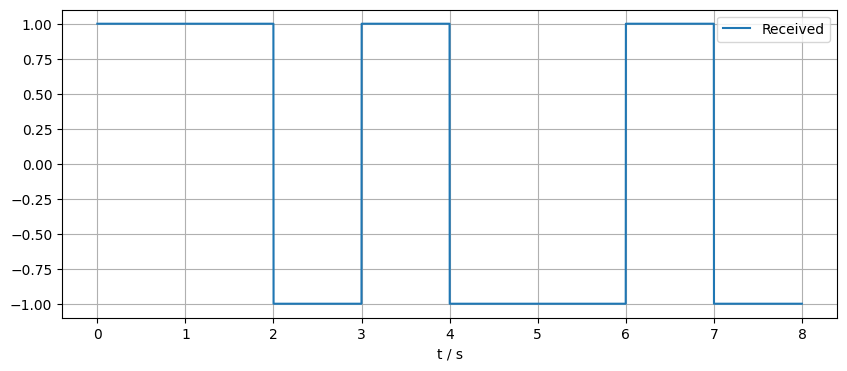

In [2]:
bitrate = 1 # 1 bit a second
fs = 1000 # sampling rate, 1000 times a second (for receiver?)
samples_per_bit = fs / bitrate
t = np.arange(0.0, 8.0, 1 / fs)

data = np.array([0, 0, 1, 0, 1, 1, 0, 1])

# BPSK: 0 -> 1, 1 -> -1
symbols = 1 - 2 * data

signal = np.repeat(symbols, samples_per_bit)

plt.figure(figsize=(10, 4))
plt.plot(t, signal, label="Received")
plt.xlabel("t / s")
plt.legend()
plt.grid(True)
plt.show()

In [89]:
import numpy as np, sounddevice as sd, crcmod.predefined, time

###############################################################################
# USER-TUNABLE SETTINGS
Baud      = 100             # symbols per second  ← Slower & steadier
f0, f1    = 300, 1000    # mark / space freqs
fs        = 48000          # audio sample rate
amp       = 1.0             # 0‒1 loudness (raise for more volume!)
tx_device = 3               # 🔧 YOUR speaker/output device index
###############################################################################

Tb = int(fs / Baud)         # samples per symbol
preamble  = [1,1,1,0,0,0,1,0,0,1,0] 

crc16 = crcmod.predefined.mkCrcFun('x25')

def bits_to_wave(bits):
    t     = np.arange(len(bits) * Tb) / fs
    freqs = np.where(np.repeat(bits, Tb) == 0, f0, f1)
    wave  = amp * np.sin(2*np.pi*freqs * t)
    return wave.astype(np.float32)

def build_frame(payload: bytes) -> np.ndarray:
    pkt  = b'\x2A\x2A' + payload + crc16(payload).to_bytes(2, 'big')
    bits = np.unpackbits(np.frombuffer(pkt, dtype=np.uint8))
    frame_bits = np.concatenate((preamble, bits))
    return bits_to_wave(frame_bits)

def send(payload: bytes):
    wave = build_frame(payload)
    sd.play(wave, fs, device=tx_device, blocking=True)

text = "u r dum"
send(text.encode())

In [74]:
len("epepep i am a wompy!!")

21